<a href="https://colab.research.google.com/github/Litharsan11/Telco_Customer_Churn_ML_CW/blob/main/2425446_20240872_Litharsan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data**

In [1]:
# Imports and plot style settings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use("ggplot")

from google.colab import drive

In [2]:
# Mount Drive
drive.mount('/content/drive')

# Load dataset
path = '/content/drive/MyDrive/Machine_Learning/WA_Fn-UseC_-Telco-Customer-Churn.csv'
entries = pd.read_csv(path)

print("Dataset Loaded Successfully!")

Mounted at /content/drive
Dataset Loaded Successfully!


# **Exploratory Data Analysis (EDA)**

In [3]:
# Display the first 5 rows of the DataFrame
entries.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape
print("Shape:", entries.shape)
print()
# Summary
entries.info()
print()
# Description Statics of Numeric entries
print(entries.describe())
print()

Shape: (7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

In [5]:
#Identify categorical & numerical columns
cat_cols = entries.select_dtypes(include=['object']).columns
num_cols = entries.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [6]:
# Check duplicates
print("Duplicates:", entries.duplicated().sum())
print()

Duplicates: 0



In [7]:
# Check missing values
print("Missing Values:\n", entries.isnull().sum())
print()
print("Missing Values:\n", entries.isna().sum())

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
print("Blank values in every column")
for col in entries.columns:
    rows = entries[entries[col].astype(str).str.strip() == ""]
    blanks = (entries[col].astype(str).str.strip() == "").sum()
    print(f"{col}: {blanks}")
    if len(rows) > 0:
        print(f"\nRows with blanks in {col}:")
        display(rows)

Blank values in every column
customerID: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 11

Rows with blanks in TotalCharges:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Churn: 0


In [9]:
numeric_cols = entries.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = [c for c in entries.columns if entries[c].dtype == "O" and c != "customerID"]

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [10]:
# Checking unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
print()
categorical_cols = entries.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {entries[col].nunique()} unique values")
    print(entries[col].unique())
    print()
    print(entries[col].value_counts())
    print()


Unique Values in Categorical Columns:

customerID: 7043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

gender: 2 unique values
['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner: 2 unique values
['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents: 2 unique values
['No' 'Yes']

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService: 2 unique values
['No' 'Yes']

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines: 3 unique values
['No phone service' 'No' 'Yes']

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService: 3

In [11]:
# Count of 'unknown' values in categorical columns
for col in categorical_cols:
    unknown_count = (entries[col] == 'unknown').sum()
    total_count = len(entries)
    print(f"\nProcessing column: {col}")
    print(f"  'unknown' values: {unknown_count} out of {total_count} ({(unknown_count / total_count) * 100:.2f}%)")


Processing column: customerID
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: gender
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Partner
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Dependents
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: PhoneService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: MultipleLines
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: InternetService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineSecurity
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineBackup
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: DeviceProtection
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: TechSupport
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingTV
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingMovies
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Contract


In [12]:
# Value counts for the target variable
print("\nTarget Variable Distribution:")
print(entries['Churn'].value_counts())

print("\nChurn rate:\n", entries["Churn"].value_counts(normalize=True)* 100)


Target Variable Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn rate:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


# **Data Visualization**


Churn value counts:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn rate:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-2938085077.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries['Churn'], palette='Set2')


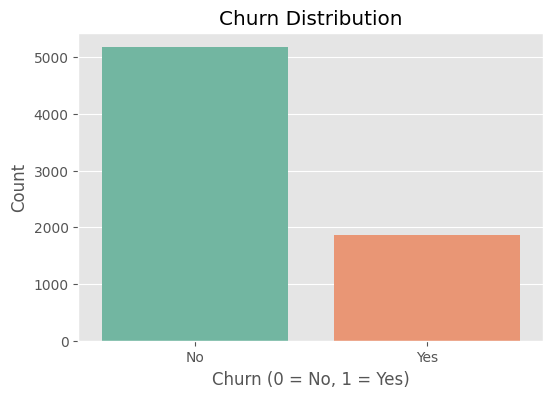

In [13]:
#Churn Distribution

print("\nChurn value counts:\n", entries["Churn"].value_counts())
print("\nChurn rate:\n", entries["Churn"].value_counts(normalize=True)* 100)

plt.figure(figsize=(6,4))
sns.countplot(x=entries['Churn'], palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

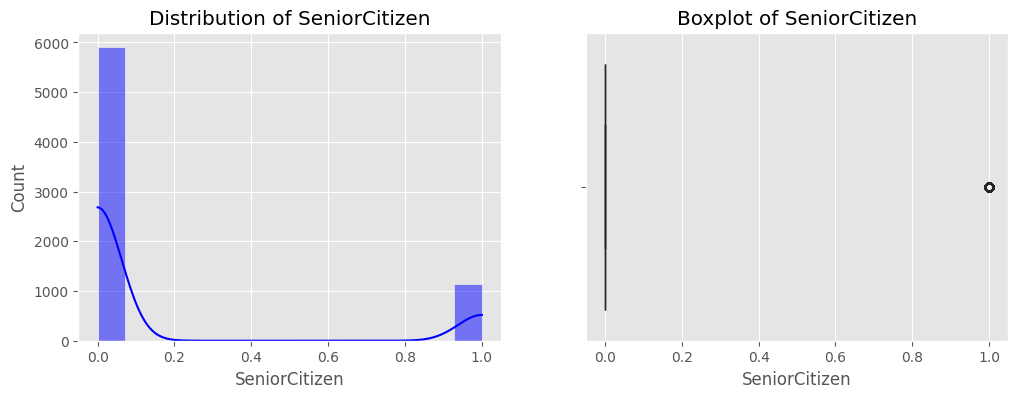

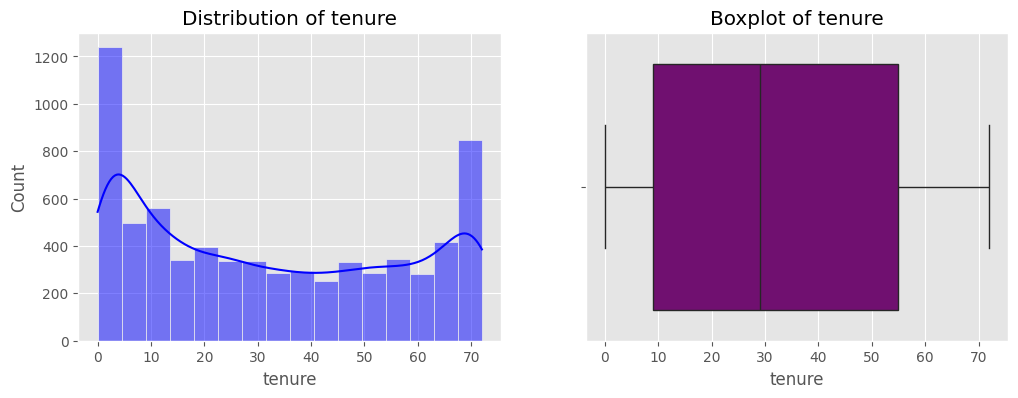

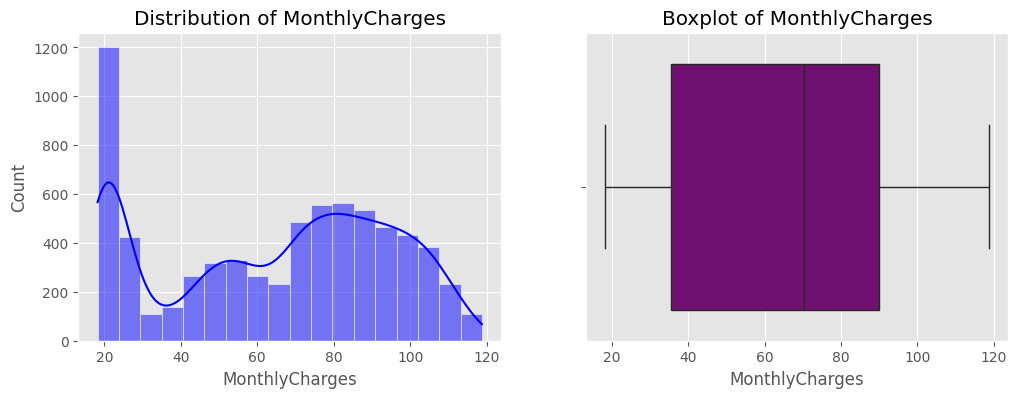

In [14]:
#Numerical Features Distribution
num_cols = entries.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(entries[col], kde=True, color="blue")
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=entries[col], color="purple")
    plt.title(f"Boxplot of {col}")

    plt.show()


/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


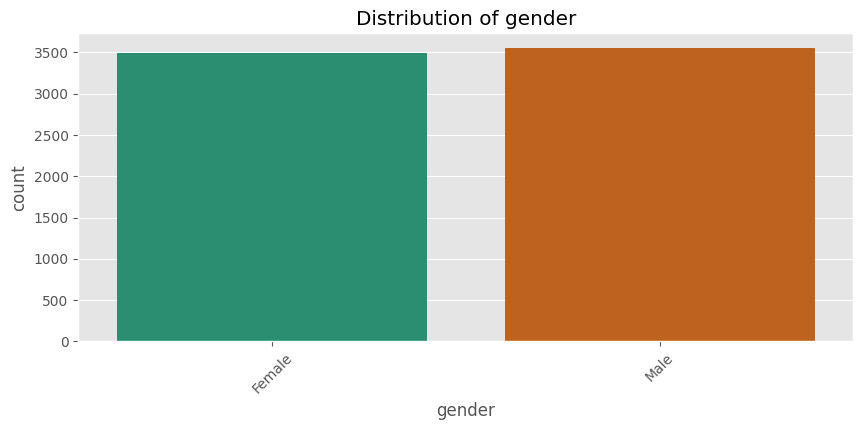

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


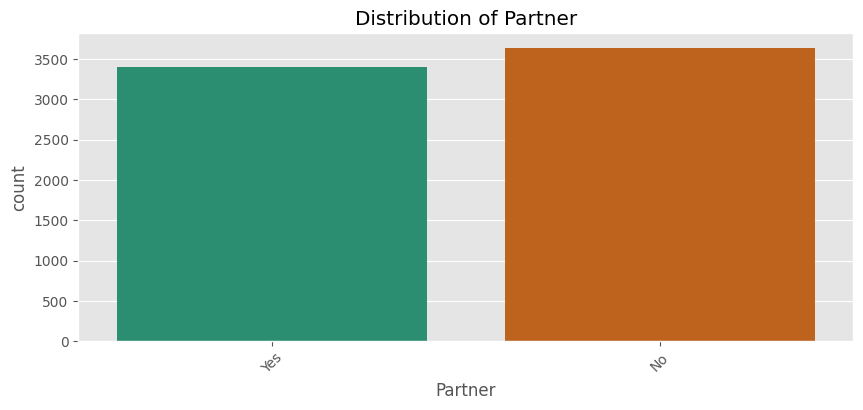

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


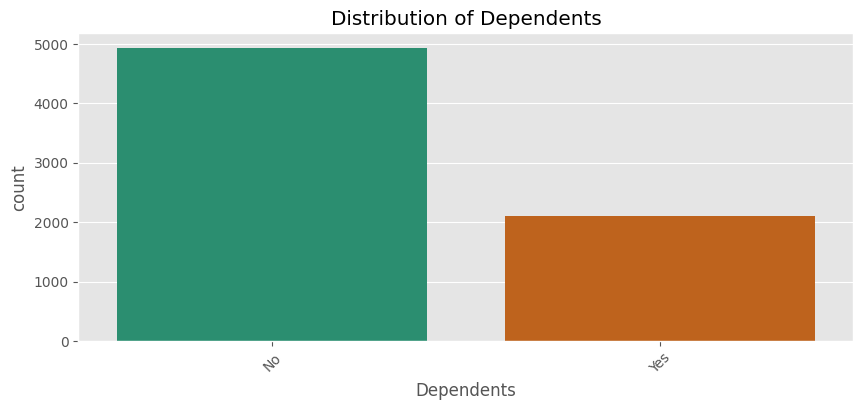

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


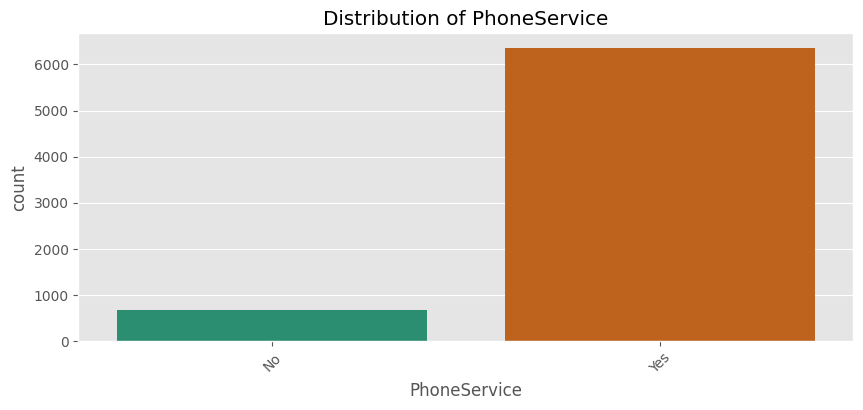

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


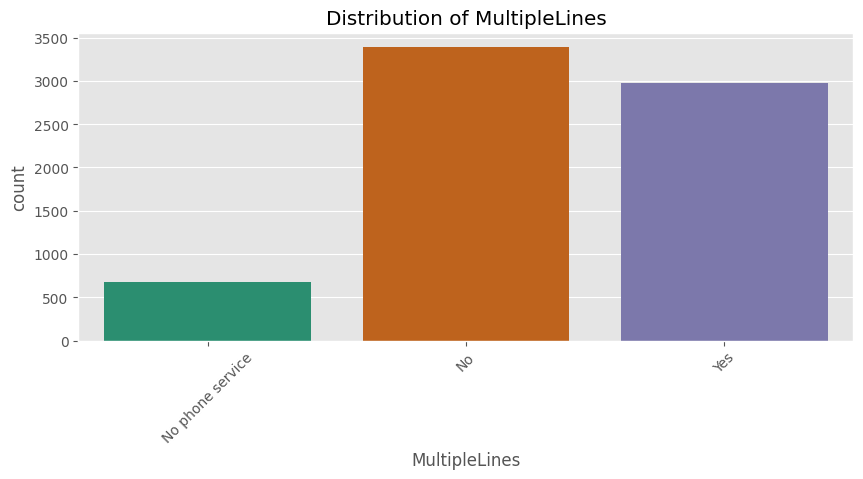

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


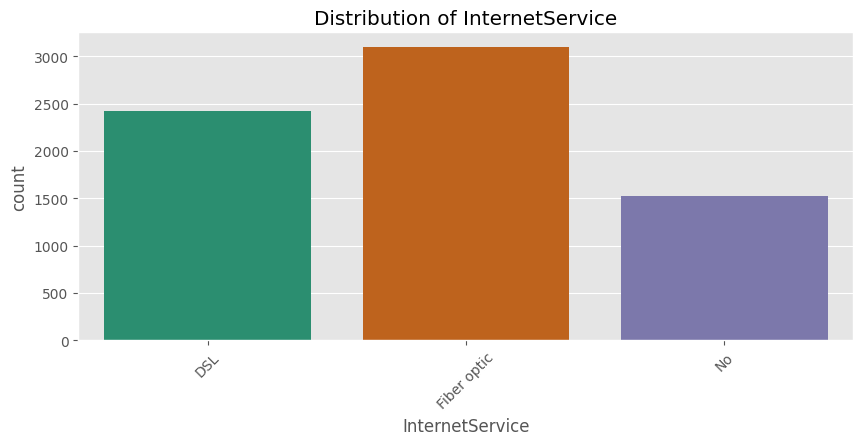

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


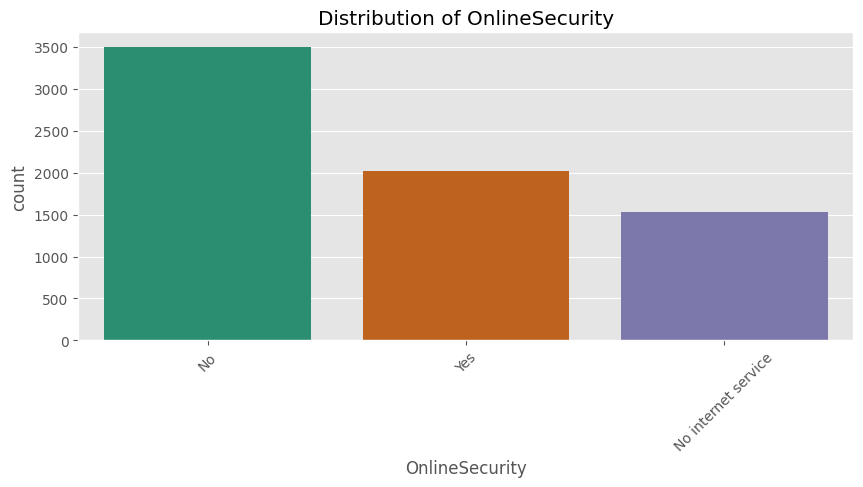

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


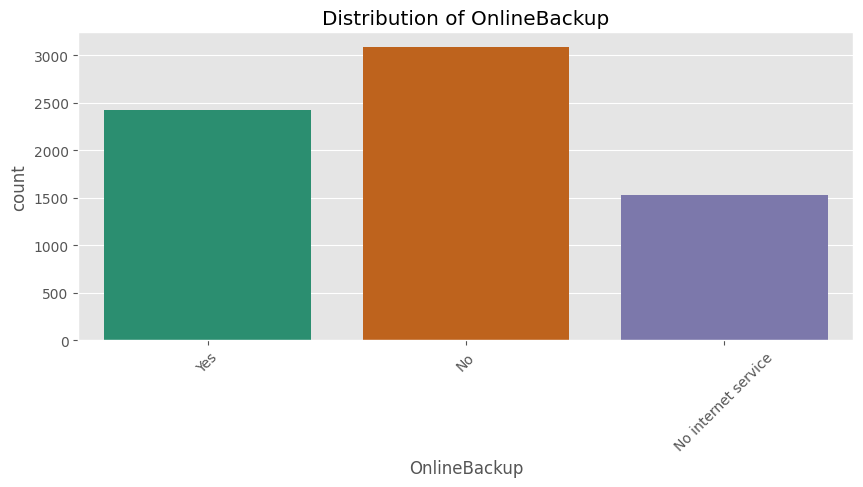

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


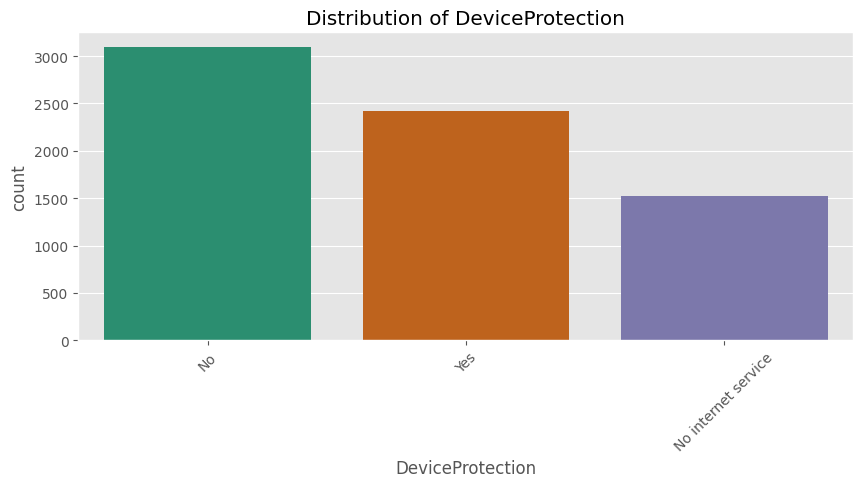

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


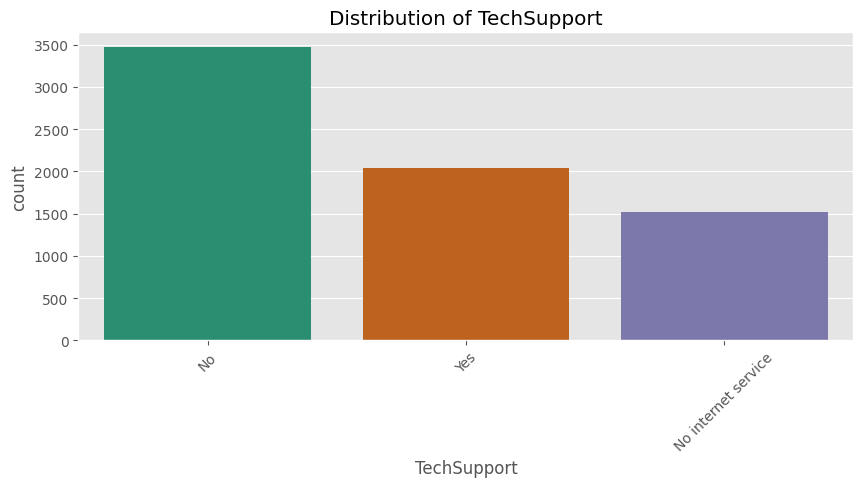

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


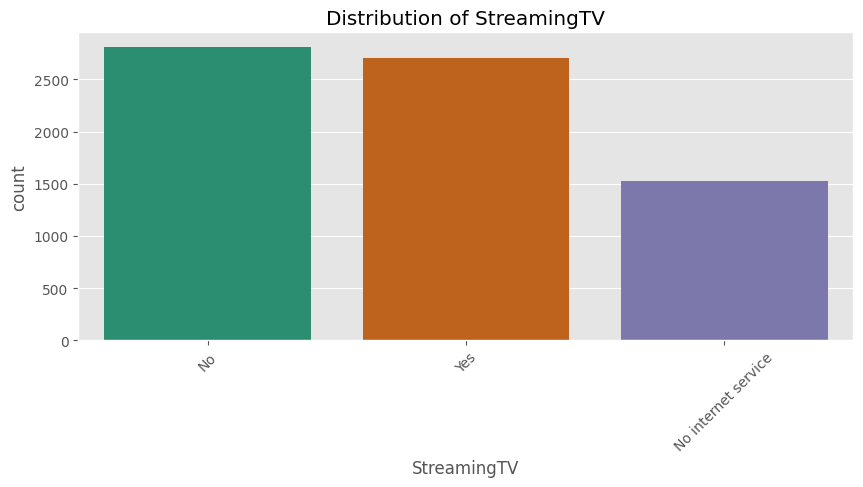

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


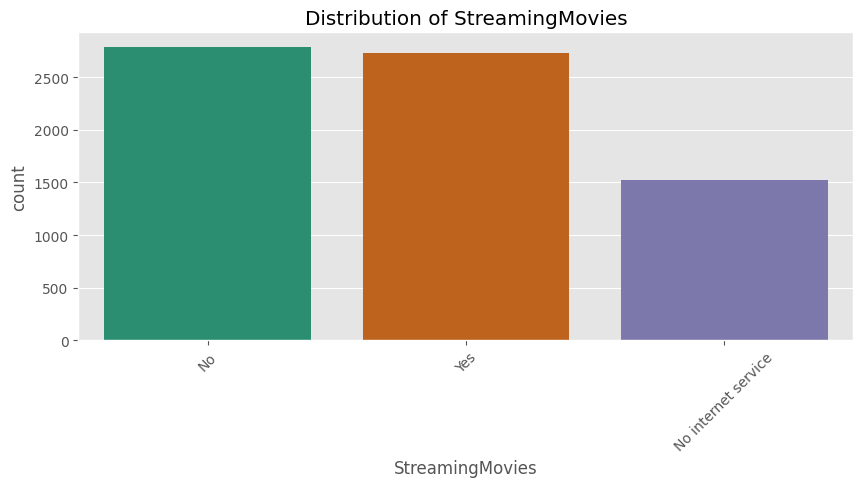

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


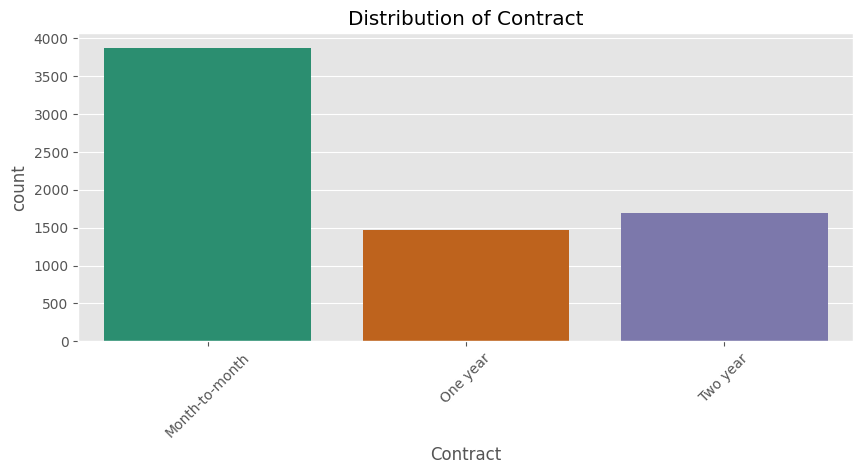

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


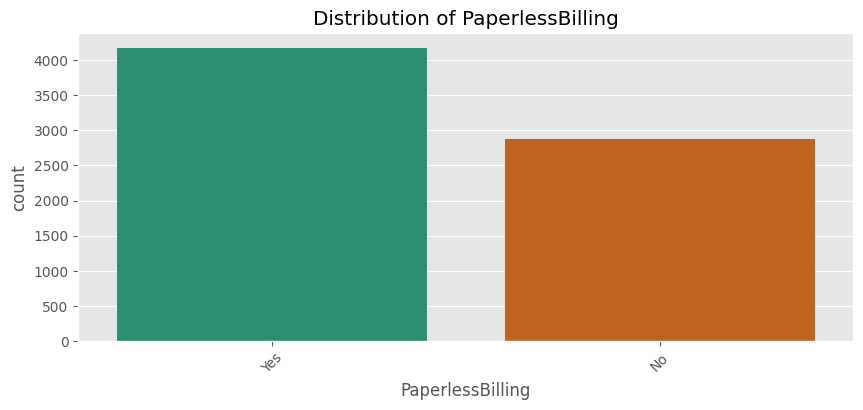

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


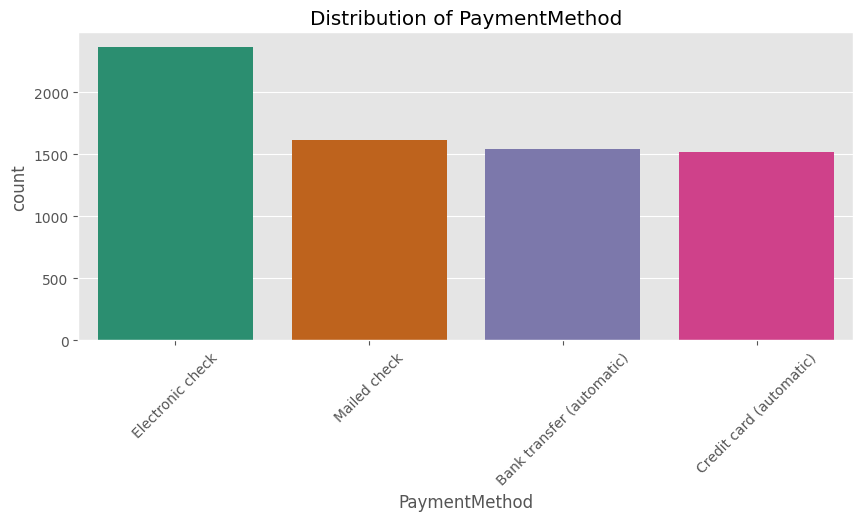

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


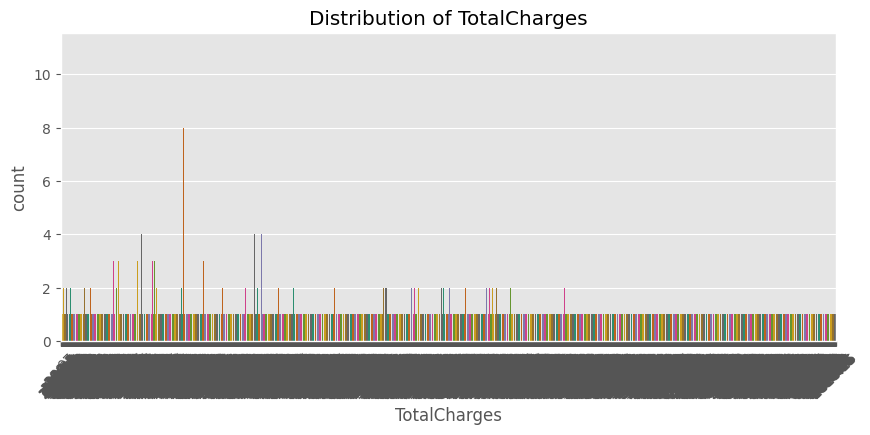

/tmp/ipython-input-1569906001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=entries[col], palette='Dark2')


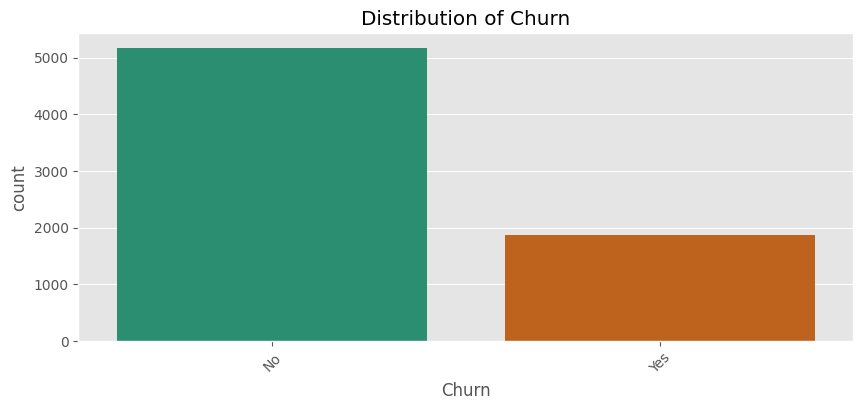

In [15]:
#Categorical Feature Distribution
cat_cols = [c for c in entries.columns if entries[c].dtype == "O" and c != "customerID"]

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=entries[col], palette='Dark2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


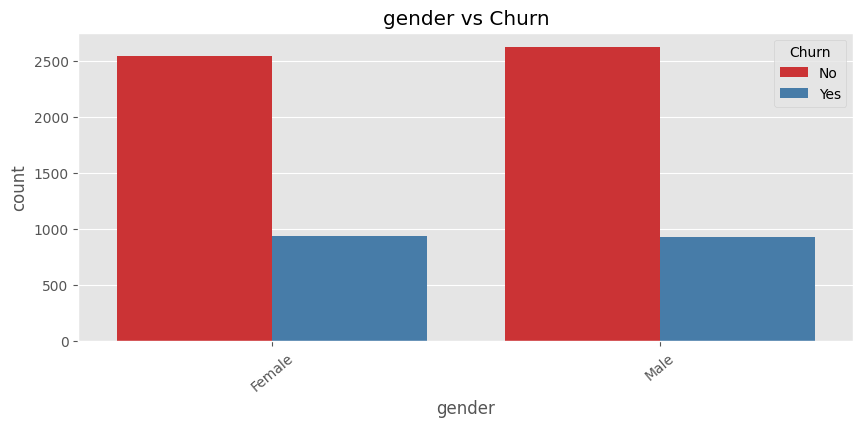

Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903


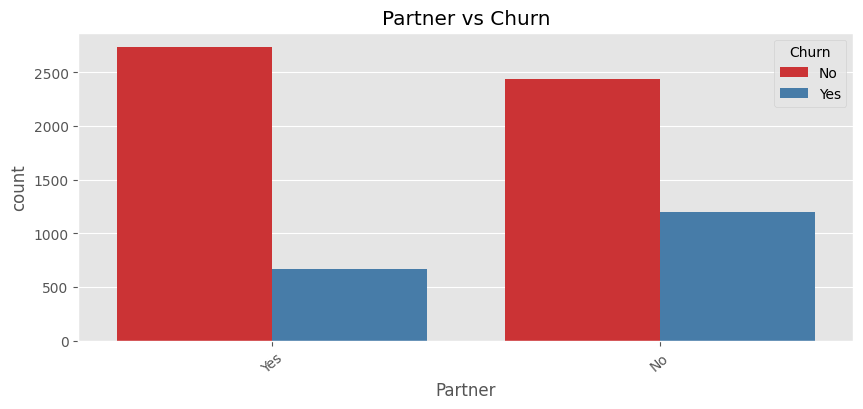

Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237


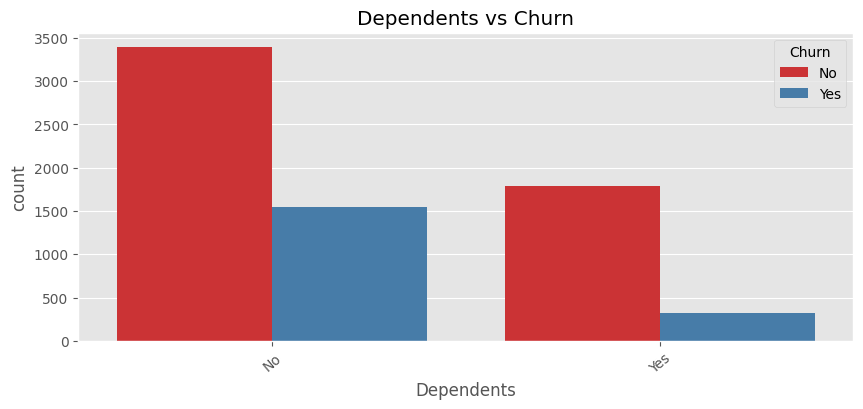

Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637


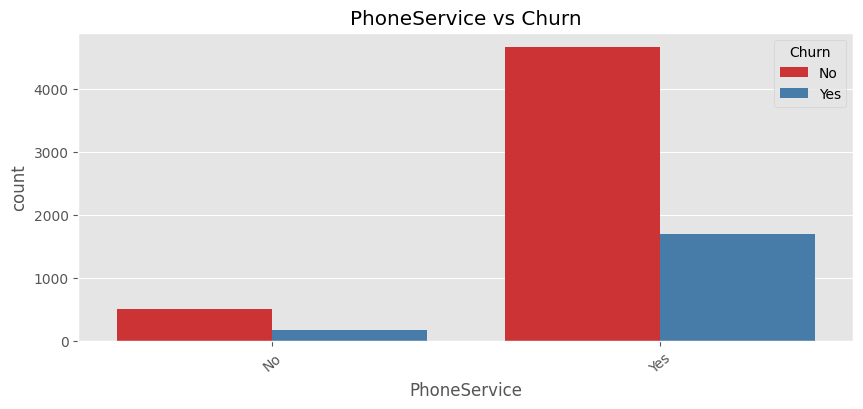

Churn                    No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71.390104  28.609896


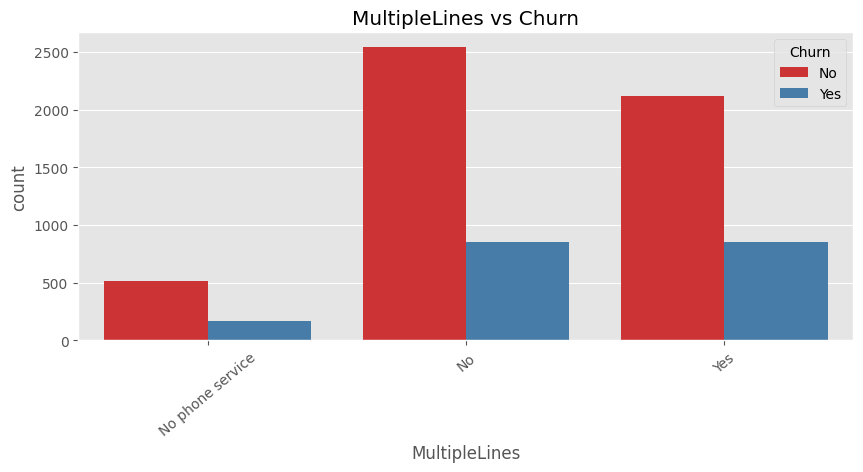

Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


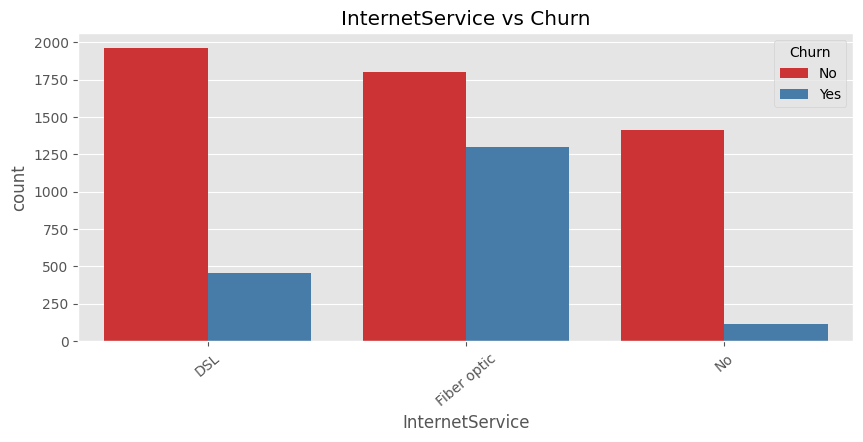

Churn                       No        Yes
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194


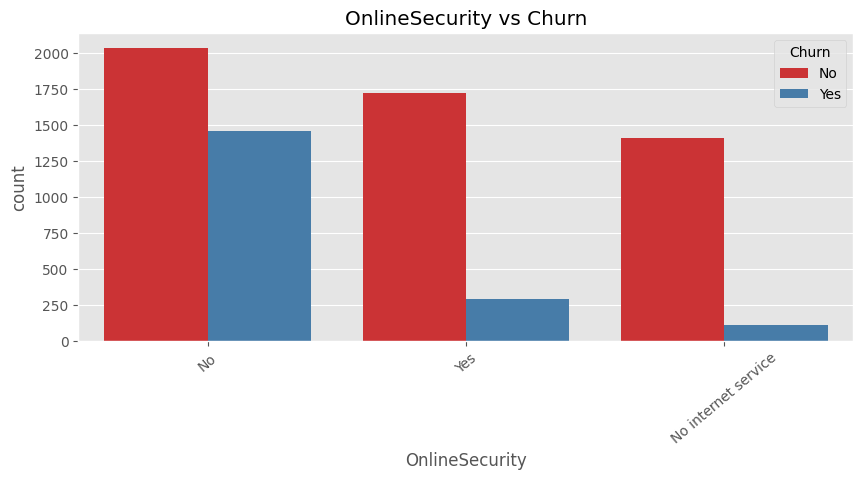

Churn                       No        Yes
OnlineBackup                             
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  78.468506  21.531494


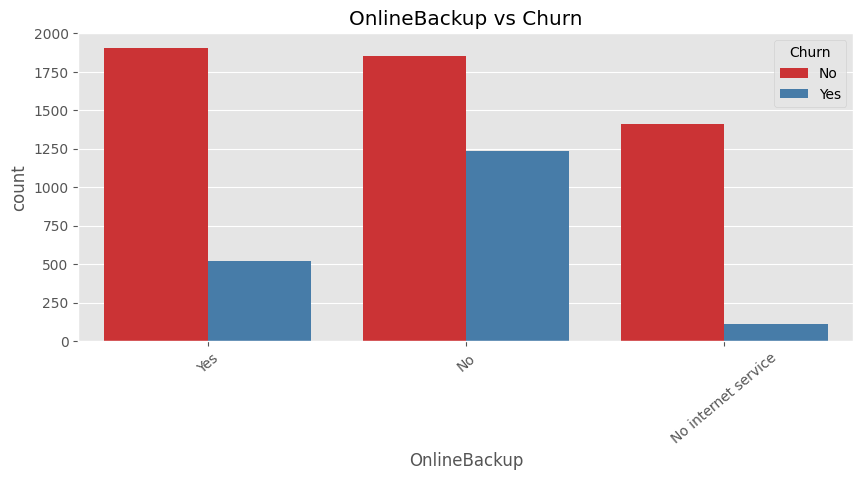

Churn                       No        Yes
DeviceProtection                         
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064


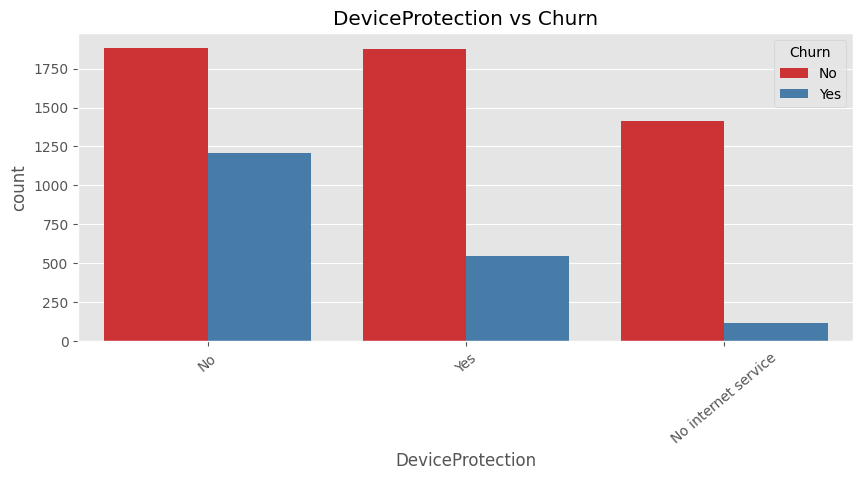

Churn                       No        Yes
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341


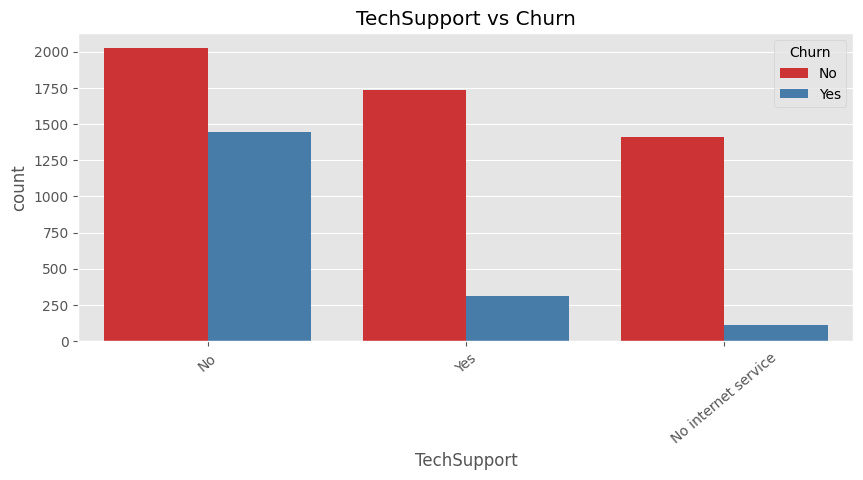

Churn                       No        Yes
StreamingTV                              
No                   66.476868  33.523132
No internet service  92.595020   7.404980
Yes                  69.929812  30.070188


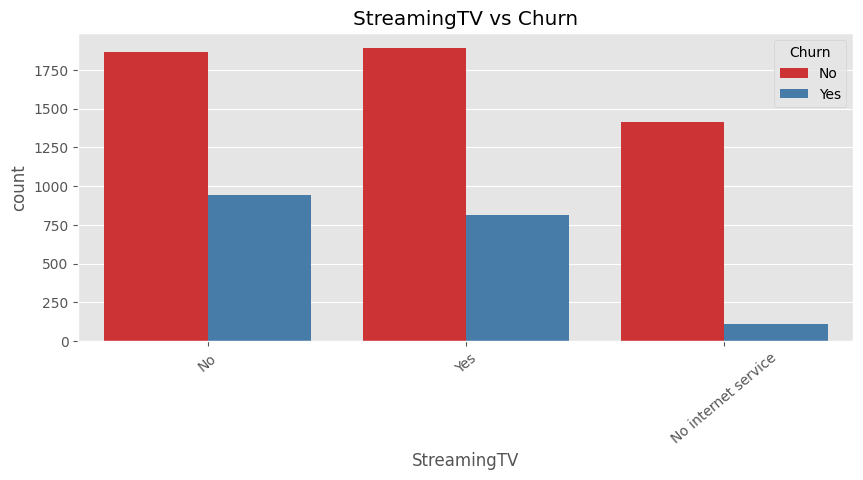

Churn                       No        Yes
StreamingMovies                          
No                   66.319569  33.680431
No internet service  92.595020   7.404980
Yes                  70.058565  29.941435


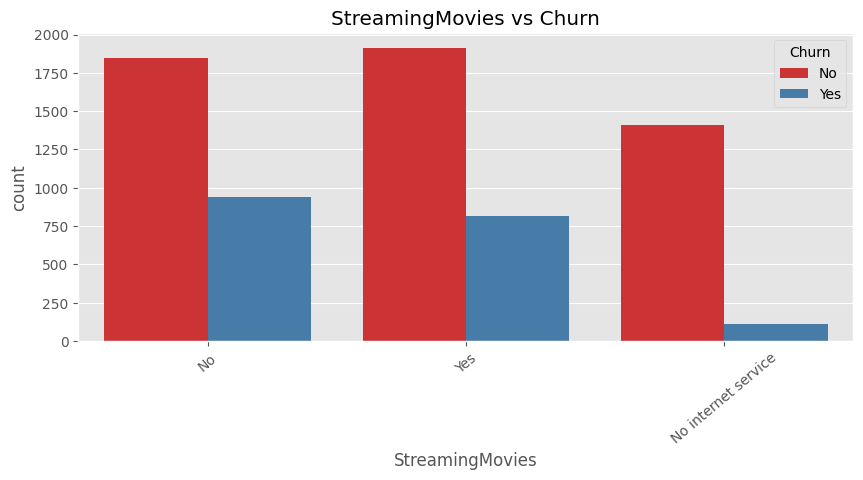

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


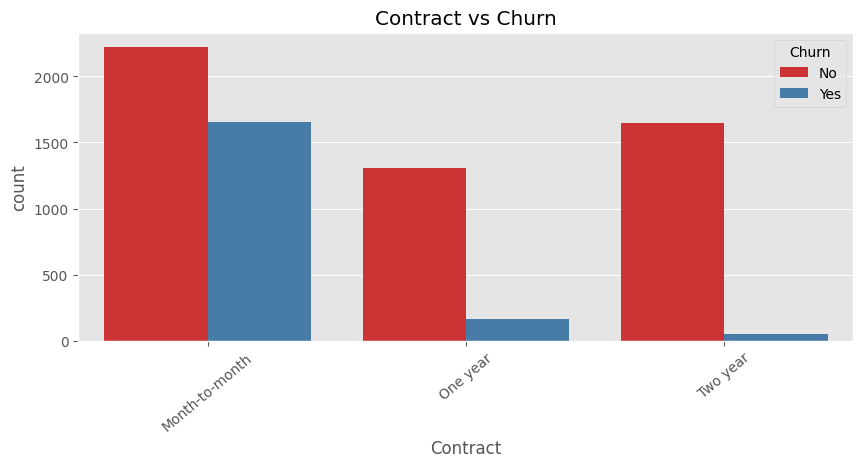

Churn                    No        Yes
PaperlessBilling                      
No                83.669916  16.330084
Yes               66.434908  33.565092


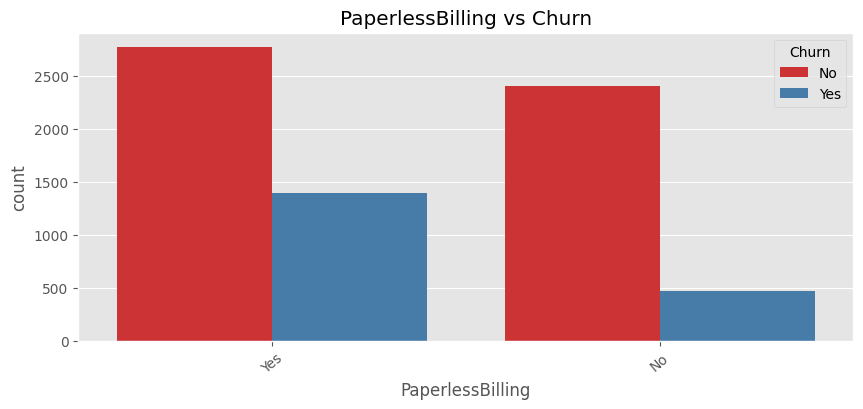

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


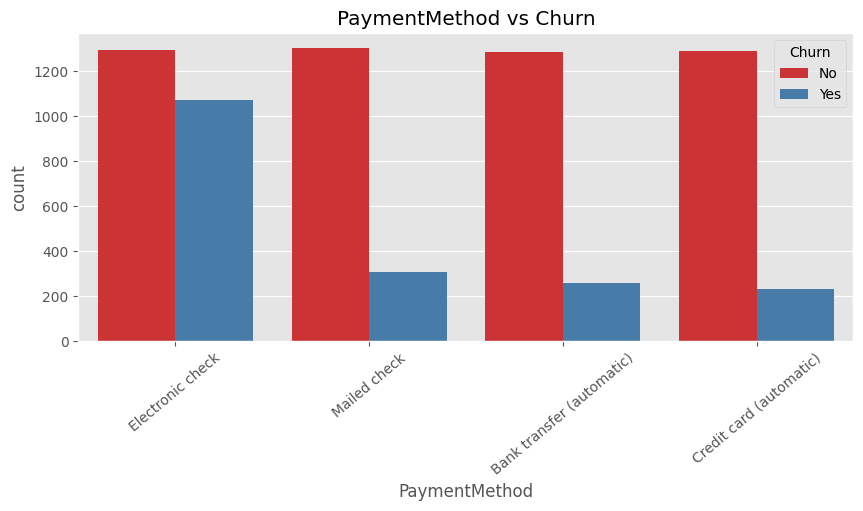

Churn            No    Yes
TotalCharges              
              100.0    0.0
100.2         100.0    0.0
100.25          0.0  100.0
100.35        100.0    0.0
100.4           0.0  100.0
...             ...    ...
997.75        100.0    0.0
998.1         100.0    0.0
999.45          0.0  100.0
999.8         100.0    0.0
999.9         100.0    0.0

[6531 rows x 2 columns]


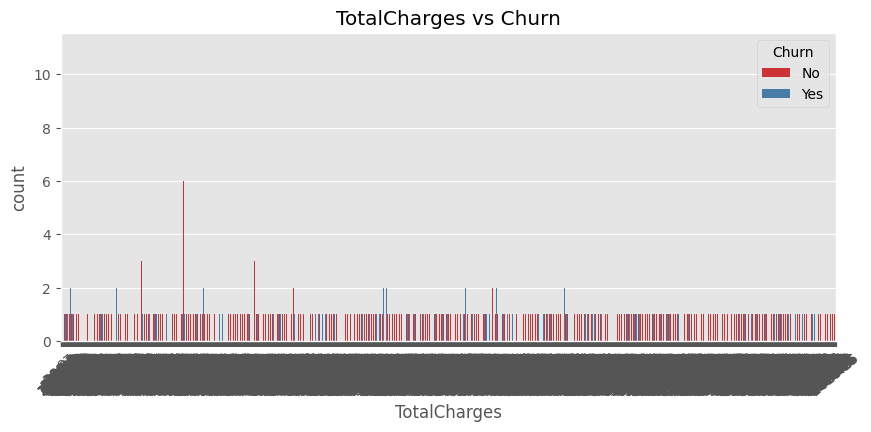

Churn     No    Yes
Churn              
No     100.0    0.0
Yes      0.0  100.0


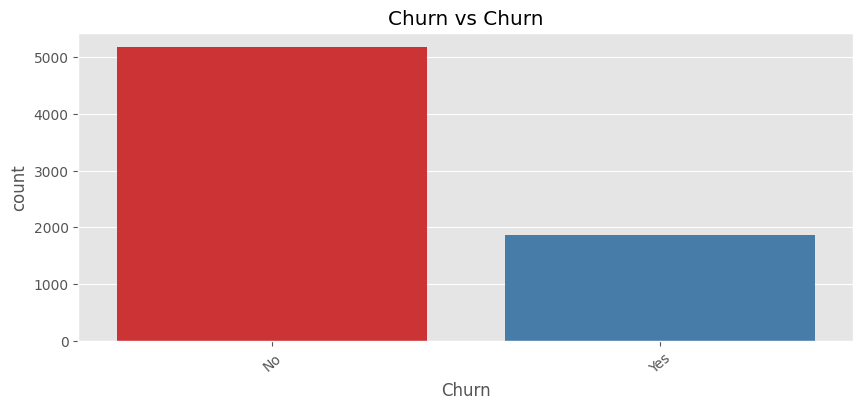

In [16]:
#Churn vs Categorical Features
for col in cat_cols:
    cat = pd.crosstab(entries[col], entries['Churn'],normalize="index") * 100
    print(cat)
    plt.figure(figsize=(10,4))
    sns.countplot(x=entries[col], hue=entries['Churn'], palette='Set1')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=40)
    plt.show()

/tmp/ipython-input-4137726547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=entries['Churn'], y=entries[col], palette='Set3')


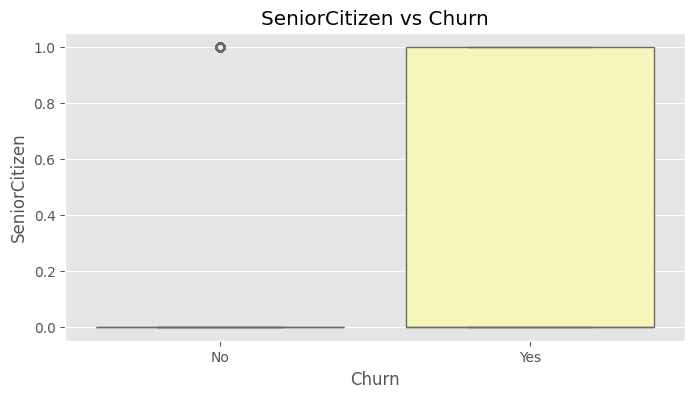

/tmp/ipython-input-4137726547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=entries['Churn'], y=entries[col], palette='Set3')


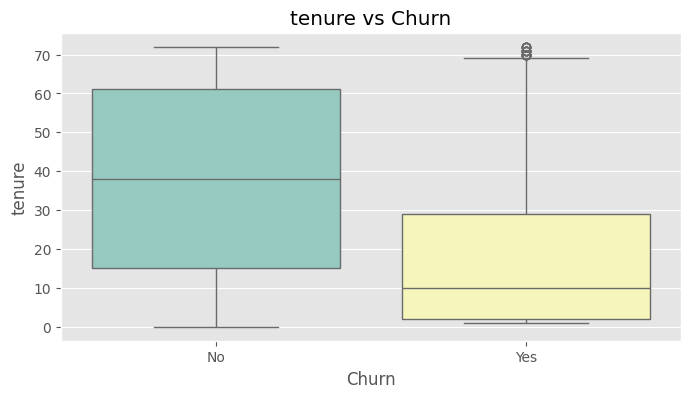

/tmp/ipython-input-4137726547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=entries['Churn'], y=entries[col], palette='Set3')


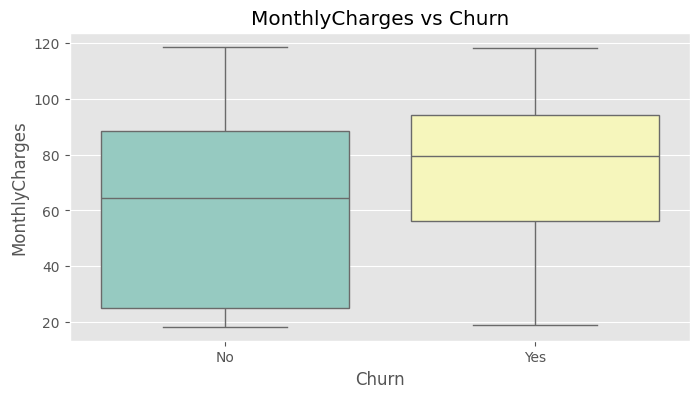

In [17]:
#Churn vs Numerical Features
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=entries['Churn'], y=entries[col], palette='Set3')
    plt.title(f"{col} vs Churn")
    plt.show()


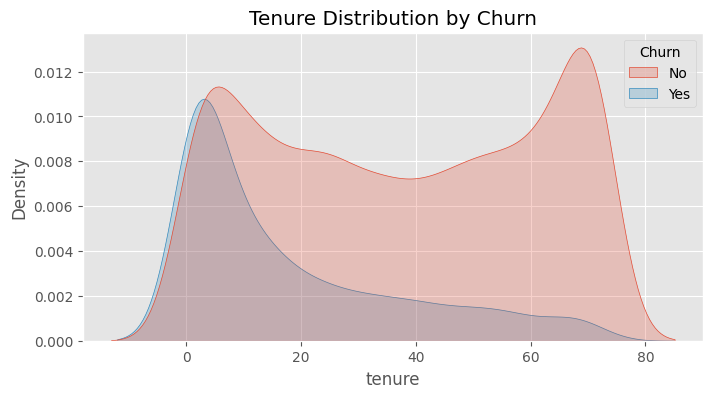

In [18]:
#Tenure distribution by Churn
plt.figure(figsize=(8,4))
sns.kdeplot(data=entries, x='tenure', hue='Churn', fill=True)
plt.title("Tenure Distribution by Churn")
plt.show()

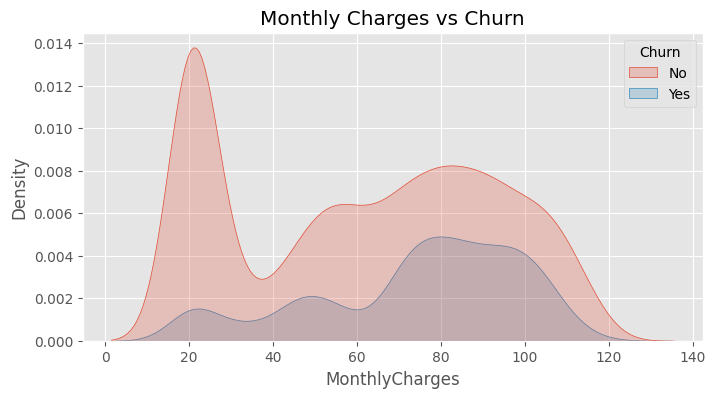

In [19]:
#Monthly Charges vs Churn
plt.figure(figsize=(8,4))
sns.kdeplot(data=entries, x='MonthlyCharges', hue='Churn', fill=True)
plt.title("Monthly Charges vs Churn")
plt.show()


Churn % for: SeniorCitizen

Churn                      No        Yes
SeniorCitizen bins                      
(-0.001, 1.0]       73.463013  26.536987


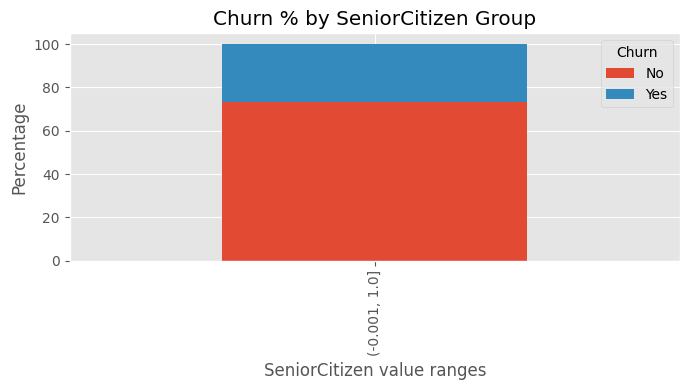


Churn % for: tenure

Churn                 No        Yes
tenure bins                        
(-0.001, 6.0]  47.062795  52.937205
(6.0, 20.0]    66.571224  33.428776
(20.0, 40.0]   77.627841  22.372159
(40.0, 60.0]   84.444444  15.555556
(60.0, 72.0]   93.390192   6.609808


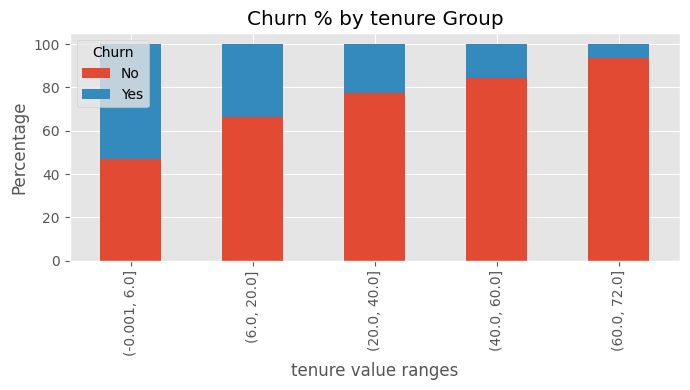


Churn % for: MonthlyCharges

Churn                       No        Yes
MonthlyCharges bins                      
(18.249, 25.05]      90.845070   9.154930
(25.05, 58.83]       75.017895  24.982105
(58.83, 79.1]        70.233877  29.766123
(79.1, 94.25]        63.894812  36.105188
(94.25, 118.75]      67.187500  32.812500


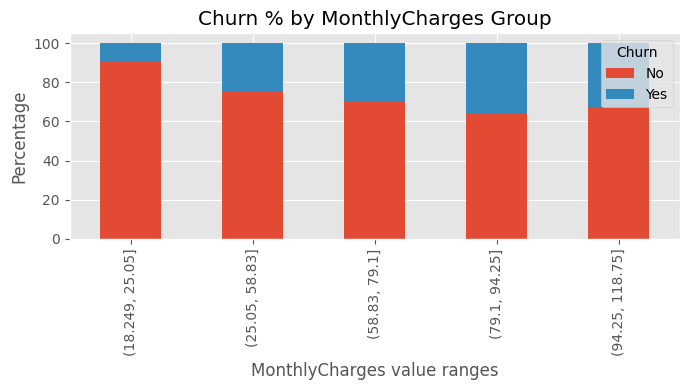

In [20]:
numeric_cols = entries.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != "Churn"]

for col in numeric_cols:
    col_group = pd.qcut(entries[col], q=5, duplicates='drop')

    # Churn % per bin
    churn_table = pd.crosstab(col_group, entries["Churn"], normalize="index") * 100
    churn_table.index.name = f"{col} bins"

    print(f"\nChurn % for: {col}\n")
    print(churn_table)

    # Plot
    churn_table.plot(kind="bar", stacked=True, figsize=(7, 4))
    plt.title(f"Churn % by {col} Group")
    plt.ylabel("Percentage")
    plt.xlabel(f"{col} value ranges")
    plt.legend(title="Churn")
    plt.tight_layout()
    plt.show()

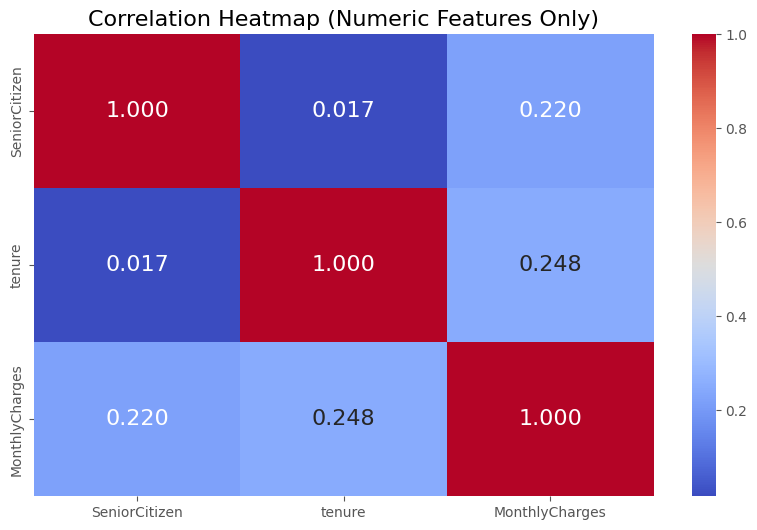

In [21]:
plt.figure(figsize=(10,6))

# Select only numeric columns
numeric_data = entries.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap with larger numbers
sns.heatmap(
    numeric_data.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".3f",
    annot_kws={"size": 16}
)

plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=16)
plt.show()

# **Preprocessing**

In [22]:
entries = pd.read_csv(path)

# Shape before duplicate drop
print("Shape before duplicate drop:", entries.shape)
print()
entries = entries.drop_duplicates()
# Shape after duplicate drop
print("Shape after duplicate drop:", entries.shape)

Shape before duplicate drop: (7043, 21)

Shape after duplicate drop: (7043, 21)


In [23]:
#Identify categorical & numerical columns
cat_cols = entries.select_dtypes(include=['object']).columns
num_cols = entries.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [24]:
# Drop Customer ID
entries = entries.drop("customerID", axis=1)

# Shape after dropping Cust ID
print("Shape:", entries.shape)
print()
# Print top 5 rows
print("Top 5 rows")
entries.head()

Shape: (7043, 20)

Top 5 rows


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#Identify categorical & numerical columns
cat_cols = entries.select_dtypes(include=['object']).columns
num_cols = entries.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [26]:
#Convert 'TotalCharges' to numeric
entries["TotalCharges"] = pd.to_numeric(entries["TotalCharges"], errors='coerce')

# Correctly count NaN values
nan_count = entries["TotalCharges"].isna().sum()
print(f"NaN values in TotalCharges: {nan_count}")

#Fill NaN values with the median (as was originally commented out and is a good practice)
entries["TotalCharges"].fillna(entries["TotalCharges"].median(), inplace=True)
print(f"NaN values in TotalCharges after filling: {entries['TotalCharges'].isna().sum()}")

NaN values in TotalCharges: 11
NaN values in TotalCharges after filling: 0


/tmp/ipython-input-2289013975.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  entries["TotalCharges"].fillna(entries["TotalCharges"].median(), inplace=True)


In [27]:
# Remove rows where ANY column contains blank string or only spaces
#entries = entries[entries["TotalCharges"].notna()]
#entries = entries[entries.notna()]
print("New shape after removing blank rows:", entries.shape)

New shape after removing blank rows: (7043, 20)


In [28]:
# Correctly count NaN values
nan_count = entries["TotalCharges"].isna().sum()
print(f"NaN values in TotalCharges: {nan_count}")

NaN values in TotalCharges: 0


In [29]:
# Shape after managing Nan values
print("Shape:", entries.shape)
print()
# Print top 5 rows
print("Top 5 rows")
entries.head()

Shape: (7043, 20)

Top 5 rows


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
#Identify categorical & numerical columns
cat_cols = entries.select_dtypes(include=['object']).columns
num_cols = entries.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [31]:
# Label encode target variable "Churn"
entries['Churn'] = entries['Churn'].map({'Yes':1,'No':0})
print(entries['Churn'].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


In [32]:
# Shape after Label Encoding
print("Shape:", entries.shape)
print()
# Print top 5 rows
print("Top 5 rows")
entries.head()

Shape: (7043, 20)

Top 5 rows


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [33]:
# One-Hot Encoding
entries = pd.get_dummies(entries, drop_first=True)
print(entries.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            Fa

In [34]:
# Shape after One-Hot Encoding
print("Shape:", entries.shape)
print()
# Print top 5 rows
print("Top 5 rows")
entries.head()

Shape: (7043, 31)

Top 5 rows


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# **Ready for Model Training**

In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# X, y split
X = entries.drop('Churn', axis=1)
y = entries['Churn']

# 60% train, 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# 20% validation, 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Scaling (fit only on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Train:", X_train_res.shape, y_train_res.value_counts())
print("Validation:", X_val_scaled.shape, y_val.value_counts())
print("Test:", X_test_scaled.shape, y_test.value_counts())
print()
print("Before SMOTE:", y_train.value_counts())
print("After  SMOTE:", y_train_res.value_counts())

Train: (6208, 30) Churn
0    3104
1    3104
Name: count, dtype: int64
Validation: (1409, 30) Churn
0    1035
1     374
Name: count, dtype: int64
Test: (1409, 30) Churn
0    1035
1     374
Name: count, dtype: int64

Before SMOTE: Churn
0    3104
1    1121
Name: count, dtype: int64
After  SMOTE: Churn
0    3104
1    3104
Name: count, dtype: int64


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Decision Tree – imbalance handle panna class_weight='balanced' use panna lam
dt_clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    criterion='gini',      # ‘entropy’ try pannalaam
    class_weight='balanced',   # improve generalization
    random_state=42
)
dt_clf.fit(X_train_res, y_train_res)

# Validation performance
y_val_pred_dt = dt_clf.predict(X_val_scaled)
print("Decision Tree - Validation Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("\nDecision Tree - Validation Classification Report:\n")
print(classification_report(y_val, y_val_pred_dt))

# Final Test performance
y_test_pred_dt = dt_clf.predict(X_test_scaled)
print("Decision Tree - Test Accuracy:", accuracy_score(y_test, y_test_pred_dt))
print("\nDecision Tree - Test Classification Report:\n")
print(classification_report(y_test, y_test_pred_dt))

Decision Tree - Validation Accuracy: 0.7338537970191625

Decision Tree - Validation Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409

Decision Tree - Test Accuracy: 0.7154009936124911

Decision Tree - Test Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1035
           1       0.48      0.79      0.59       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

input_dim = X_train_res.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),   # smaller LR is more stable
    metrics=['accuracy']
)

es = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

history = model.fit(
    X_train_res, y_train_res,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_scaled, y_val),
    callbacks=[es],
    verbose=0
)

# Validation predictions
y_val_pred_nn = (model.predict(X_val_scaled) > 0.5).astype(int)

from sklearn.metrics import classification_report, accuracy_score

print("Neural Network - Validation Accuracy:", accuracy_score(y_val, y_val_pred_nn))
print("\nNeural Network - Validation Classification Report:\n")
print(classification_report(y_val, y_val_pred_nn))

# Test performance
y_test_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)
print("Neural Network - Test Accuracy:", accuracy_score(y_test, y_test_pred_nn))
print("\nNeural Network - Test Classification Report:\n")
print(classification_report(y_test, y_test_pred_nn))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network - Validation Accuracy: 0.7665010645848119

Neural Network - Validation Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.54      0.76      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Neural Network - Test Accuracy: 0.7544357700496807

Neural Network - Test Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [38]:
#!pip install keras-tuner --quiet

In [39]:
'''import keras_tuner as kt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

input_dim = X_train_res.shape[1]

def build_nn(hp):
    model = models.Sequential()

    # Number of neurons in first layer
    model.add(layers.Dense(
        units=hp.Int('units1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(input_dim,)
    ))

    # Dropout rate
    model.add(layers.Dropout(hp.Float('dropout1', 0.1, 0.5, step=0.1)))

    # Second hidden layer
    model.add(layers.Dense(
        units=hp.Int('units2', min_value=16, max_value=128, step=16),
        activation='relu'
    ))

    model.add(layers.Dropout(hp.Float('dropout2', 0.1, 0.5, step=0.1)))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Learning rate tuning
    lr = hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model'''

"import keras_tuner as kt\nfrom tensorflow.keras import layers, models\nfrom tensorflow.keras.optimizers import Adam\n\ninput_dim = X_train_res.shape[1]\n\ndef build_nn(hp):\n    model = models.Sequential()\n\n    # Number of neurons in first layer\n    model.add(layers.Dense(\n        units=hp.Int('units1', min_value=32, max_value=256, step=32),\n        activation='relu',\n        input_shape=(input_dim,)\n    ))\n\n    # Dropout rate\n    model.add(layers.Dropout(hp.Float('dropout1', 0.1, 0.5, step=0.1)))\n\n    # Second hidden layer\n    model.add(layers.Dense(\n        units=hp.Int('units2', min_value=16, max_value=128, step=16),\n        activation='relu'\n    ))\n\n    model.add(layers.Dropout(hp.Float('dropout2', 0.1, 0.5, step=0.1)))\n\n    # Output layer\n    model.add(layers.Dense(1, activation='sigmoid'))\n\n    # Learning rate tuning\n    lr = hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])\n\n    model.compile(\n        optimizer=Adam(learning_rate=lr),\n      

In [40]:
'''tuner = kt.RandomSearch(
    hypermodel=build_nn,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='nn_tuning',
    project_name='telco_churn'
)

tuner.search(
    X_train_res, y_train_res,
    epochs=30,
    validation_data=(X_val_scaled, y_val),
    verbose=1
)'''

"tuner = kt.RandomSearch(\n    hypermodel=build_nn,\n    objective='val_accuracy',\n    max_trials=10,\n    executions_per_trial=1,\n    directory='nn_tuning',\n    project_name='telco_churn'\n)\n\ntuner.search(\n    X_train_res, y_train_res,\n    epochs=30,\n    validation_data=(X_val_scaled, y_val),\n    verbose=1\n)"

In [41]:
'''best_nn = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best Hyperparameters:", best_hp.values)'''

'best_nn = tuner.get_best_models(num_models=1)[0]\nbest_hp = tuner.get_best_hyperparameters(1)[0]\n\nprint("Best Hyperparameters:", best_hp.values)'

In [42]:
'''# Validation accuracy
y_val_pred_nn = (best_nn.predict(X_val_scaled) > 0.5).astype(int)
print("\nNeural Network Validation Accuracy:", accuracy_score(y_val, y_val_pred_nn))
print(classification_report(y_val, y_val_pred_nn))

# Test accuracy
y_test_pred_nn = (best_nn.predict(X_test_scaled) > 0.5).astype(int)
print("\nNeural Network Test Accuracy:", accuracy_score(y_test, y_test_pred_nn))
print(classification_report(y_test, y_test_pred_nn))'''

'# Validation accuracy\ny_val_pred_nn = (best_nn.predict(X_val_scaled) > 0.5).astype(int)\nprint("\nNeural Network Validation Accuracy:", accuracy_score(y_val, y_val_pred_nn))\nprint(classification_report(y_val, y_val_pred_nn))\n\n# Test accuracy\ny_test_pred_nn = (best_nn.predict(X_test_scaled) > 0.5).astype(int)\nprint("\nNeural Network Test Accuracy:", accuracy_score(y_test, y_test_pred_nn))\nprint(classification_report(y_test, y_test_pred_nn))'

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Base model
dt = DecisionTreeClassifier(random_state=42)

# 2. Hyperparameter grid
dt_param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": [None, "balanced"]
}

# 3. GridSearchCV (CV = 5-fold)
dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Train only on SMOTE-resampled training data
dt_grid.fit(X_train_res, y_train_res)

print("Best Decision Tree Params:", dt_grid.best_params_)
print("Best CV Accuracy:", dt_grid.best_score_)

# 4. Evaluate on test set
best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

print("\nTest Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Decision Tree Params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV Accuracy: 0.8034881744372688

Test Accuracy (Decision Tree): 0.7473385379701917

Confusion Matrix (Decision Tree):
 [[808 227]
 [129 245]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1035
           1       0.52      0.66      0.58       374

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409



In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Base NN model
mlp = MLPClassifier(
    max_iter=300,        # NN converge aaganum nu konjam adhigama vechiruken
    random_state=42
)

# 2. Hyperparameter grid
mlp_param_grid = {
    "hidden_layer_sizes": [
        (32,),
        (64,),
        (32, 16),
        (64, 32)
    ],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001, 0.01],        # L2 regularization
    "learning_rate_init": [0.001, 0.01],   # initial learning rate
    "batch_size": [32, 64, 128],
    "solver": ["adam"]                     # common choice
}

# 3. GridSearchCV – use only SMOTE-resampled + scaled train data
mlp_grid = GridSearchCV(
    estimator=mlp,
    param_grid=mlp_param_grid,
    scoring="accuracy",
    cv=3,          # 3-fold (5 fold na neram adhigama agum)
    n_jobs=-1,
    verbose=1
)

mlp_grid.fit(X_train_res, y_train_res)

print("Best NN Params:", mlp_grid.best_params_)
print("Best CV Accuracy (NN):", mlp_grid.best_score_)

# 4. Evaluate best NN on test data
best_mlp = mlp_grid.best_estimator_
y_pred_nn = best_mlp.predict(X_test_scaled)

print("\nTest Accuracy (Neural Network):", accuracy_score(y_test, y_pred_nn))
print("\nConfusion Matrix (Neural Network):\n", confusion_matrix(y_test, y_pred_nn))
print("\nClassification Report (Neural Network):\n", classification_report(y_test, y_pred_nn))

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best NN Params: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 128, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best CV Accuracy (NN): 0.8419853227889035

Test Accuracy (Neural Network): 0.7295954577714692

Confusion Matrix (Neural Network):
 [[831 204]
 [177 197]]

Classification Report (Neural Network):
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1035
           1       0.49      0.53      0.51       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.73      0.73      1409

